In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso


In [3]:
data = pd.read_csv("vehicle details.csv")
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [5]:
data.shape

(4340, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [16]:
print(data.fuel.value_counts())
print("Now printing the seller types:")
print(data.seller_type.value_counts())
print("Now printing the transmission types:")
print(data.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
Now printing the seller types:
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
Now printing the transmission types:
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


# Encoding the categorical data:"Means to change the alphabetical data into number

In [23]:
data.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [21]:
data.seller_type.value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [32]:
data.transmission.value_counts()

transmission
0    3892
1     448
Name: count, dtype: int64

In [33]:
#Encoding fuel type column 
data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)
data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}}, inplace=True)
data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)
data.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1
5,Maruti Alto LX BSIII,2007,140000,125000,0,0,0,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,0,0,0,0
7,Tata Indigo Grand Petrol,2014,240000,60000,0,0,0,1
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,0,0,0,0
9,Maruti Celerio Green VXI,2017,365000,78000,2,0,0,0


# splitting the data into training and testing data

In [91]:
X = data.drop(['name','selling_price'], axis = 1)
y = data['selling_price']


In [92]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            0             0      0
1     2007      50000     0            0             0      0
2     2012     100000     1            0             0      0
3     2017      46000     0            0             0      0
4     2014     141000     1            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            0             0      1
4336  2014      80000     1            0             0      1
4337  2009      83000     0            0             0      1
4338  2016      90000     1            0             0      0
4339  2016      40000     0            0             0      0

[4340 rows x 6 columns]


In [93]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [94]:
X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.3 , random_state= 42)

In [95]:
lin_regression = LinearRegression()
lin_regression.fit(X_train, y_train)

LinearRegression()

In [96]:
training_data_prediction = lin_regression.predict(X_train)


In [97]:
from sklearn.metrics import r2_score
error_score_training= r2_score(y_train, training_data_prediction)
print(error_score_training)

0.4432696214168341


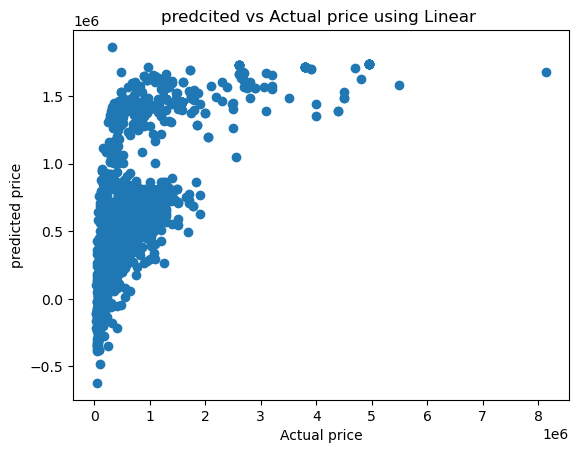

In [131]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("predcited vs Actual price using Linear ")

plt.show()

In [99]:
testing_data_prediction = lin_regression.predict(X_test)
r2_score_testing = r2_score(y_test, testing_data_prediction)
print(r2_score_testing)

0.4323213400050109


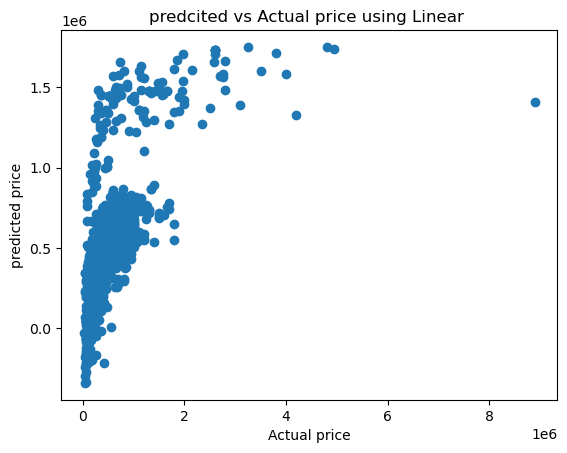

In [128]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("predcited vs Actual price using Linear ")

plt.show()

# Now do with lasso regression

In [114]:
lasso_regression = Lasso()
lasso_regression.fit(X_train, y_train)



Lasso()

In [120]:
test_data_prediction= lasso_regression.predict(X_test)
r2_score_lasso = r2_score(y_test, test_data_prediction)
print(f"The r2 score for lasso regression testing is:{r2_score_lasso}")

The r2 score for lasso regression testing is:0.43232182504884253


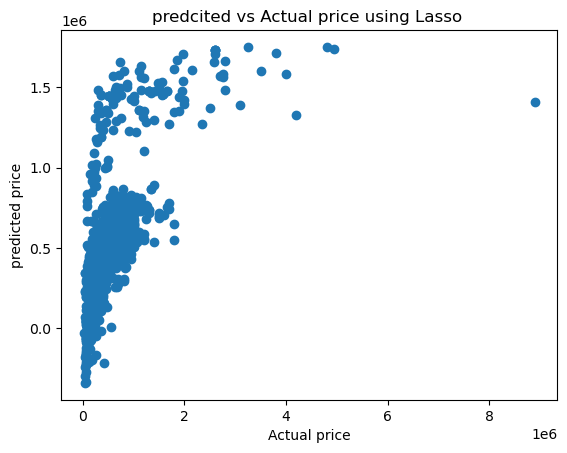

In [129]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("predcited vs Actual price using Lasso ")

plt.show()

In [122]:
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor()
decision_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [126]:
decision_test_prediction = decision_reg.predict(X_test)
r2_score_Decision = r2_score(y_test,decision_test_prediction)
print(r2_score_Decision)

0.4376792093999504


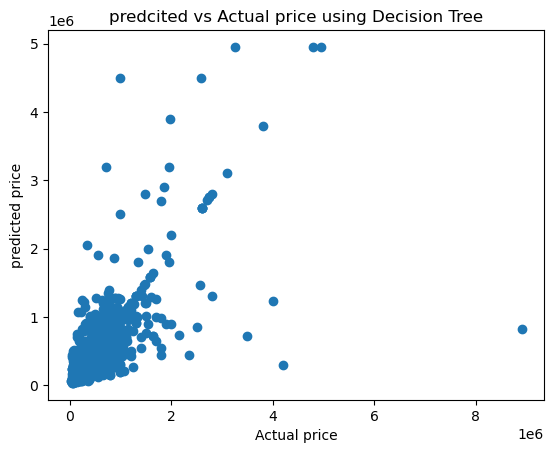

In [130]:

plt.scatter(y_test, decision_test_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("predcited vs Actual price using Decision Tree")

plt.show()